# Matplotlib

Matplotlib, в некотором роде, является ассемблером для графики в Питоне. Он предоставляет базовые команды для рисования (линии, окружности, их стили, заливка, ...), из которых потом можно сложить график (координатная сетка, график кривой, подписи, ...). При необходимости в нем можно настроить всё, что угодно, поэтому библиотека является огромной. Но чаще всего оказывается нужно просто передать данные в определенную функцию, чтобы получить нужный график с параметрами по умолчанию. Это не всегда так красиво и наглядно, как хотелось бы, но для первых этапов исследования точно сойдет.

Но не факт, что пойдет для статьи.

### Предобработка данных

Давайте решим следующую задачу. Возьмем "Марсианина", который любезно разбит по главам, и для каждой главы посчитаем, насколько активно развивается сюжет. Для этого разобьем главы на фрагменты по сто слов, для каждого фрагмента посчитаем количество глаголов, существительных и прилагательных. На их основе рассчитаем активность действия как отношение числа глаголов к числу существительных.

Начнем с кода, который рассчитывает эти показатели.

In [2]:
from lxml import html
import os 
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer 

In [3]:
path = "data/veyr"

In [4]:
# Берем все файлы и считываем их в память. Произведение хранится в xhtml, так что текст придется извлечь.
files = os.listdir(path)
texts = []
for file in files:
    tree = html.parse(f'{path}/{file}')
    texts.append('\n'.join([p.text_content() for p in tree.xpath(".//div[@class='paragraph']")]))
    

In [5]:
# Векторизуем тексты, посчитав частотности слов.
vectorizer = CountVectorizer(token_pattern='[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+')
vectors = vectorizer.fit_transform(texts)

In [6]:
# Для любопытства: что там в слова?
vectorizer.vocabulary_

{'я': 16737,
 'в': 798,
 'полной': 9947,
 'заднице': 3610,
 'это': 16709,
 'абсолютно': 72,
 'взвешенное': 1057,
 'мнение': 6127,
 'первые': 8872,
 'шесть': 16437,
 'дней': 2923,
 'из': 4320,
 'двух': 2703,
 'месяцев': 5997,
 'обещавших': 7445,
 'стать': 14319,
 'самыми': 12868,
 'значительными': 4241,
 'жизни': 3428,
 'обернулись': 7434,
 'кошмаром': 5261,
 'даже': 2601,
 'не': 6927,
 'знаю': 4242,
 'прочтёт': 11745,
 'ли': 5561,
 'кто': 5412,
 'нибудь': 7228,
 'эти': 16704,
 'строки': 14452,
 'думаю': 3219,
 'конце': 5145,
 'концов': 5151,
 'мои': 6189,
 'записи': 3894,
 'всё': 1702,
 'же': 3375,
 'найдут': 6553,
 'может': 6182,
 'лет': 5543,
 'через': 16257,
 'сто': 14360,
 'ну': 7357,
 'для': 2915,
 'отчёта': 8645,
 'на': 6337,
 'шестые': 16435,
 'сутки': 14540,
 'погиб': 9441,
 'определённо': 7978,
 'наша': 6906,
 'команда': 4991,
 'сочла': 14041,
 'меня': 5954,
 'мёртвым': 6335,
 'могу': 6159,
 'их': 4655,
 'винить': 1196,
 'быть': 794,
 'мою': 6279,
 'честь': 16270,
 'объявят': 

In [7]:
# Считаем количество токенов в каждой главе, количество разных слов.
lens = [vect.sum() for vect in vectors]
word_counts = [vect.getnnz() for vect in vectors]

In [8]:
lens, word_counts

([2070,
  2693,
  2780,
  2525,
  2850,
  3421,
  4094,
  3564,
  2654,
  2151,
  3890,
  3242,
  2846,
  3911,
  4246,
  6058,
  3352,
  3806,
  2940,
  3337,
  4249,
  3502,
  3504,
  3706,
  3914,
  5821,
  0,
  7,
  14,
  20,
  7,
  7],
 [1102,
  1301,
  1319,
  1228,
  1347,
  1483,
  1837,
  1550,
  1368,
  1124,
  1674,
  1592,
  1538,
  1666,
  2002,
  2322,
  1499,
  1581,
  1358,
  1551,
  1846,
  1581,
  1587,
  1646,
  1695,
  2298,
  0,
  7,
  14,
  20,
  7,
  7])

Я не очень знаю, зачем я это всё посчитал. Может быть потому, что изначально идея исследования не очень укладывалась у меня в голове, и я пытался фантазировать.

### Основы Matplotlib

Посмотрим каким образом работает Matplotlib. Подключим его при помощи
```Python
import matplotlib.pyplot as plt
```
Директива
```Python
%matplotlib notebook
```
необходима для Jupyter notebook, чтобы графики отображались в нем корректно и с небольшим интерактивом.
Если мы хотим отказаться от интерактива, можно дать директиву
```python
%matplotlib inline
```


In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

Для начала, построим графики длин глав и количества разных словоформ в них. Построим графики в виде столбчатой диаграммы.

<IPython.core.display.Javascript object>


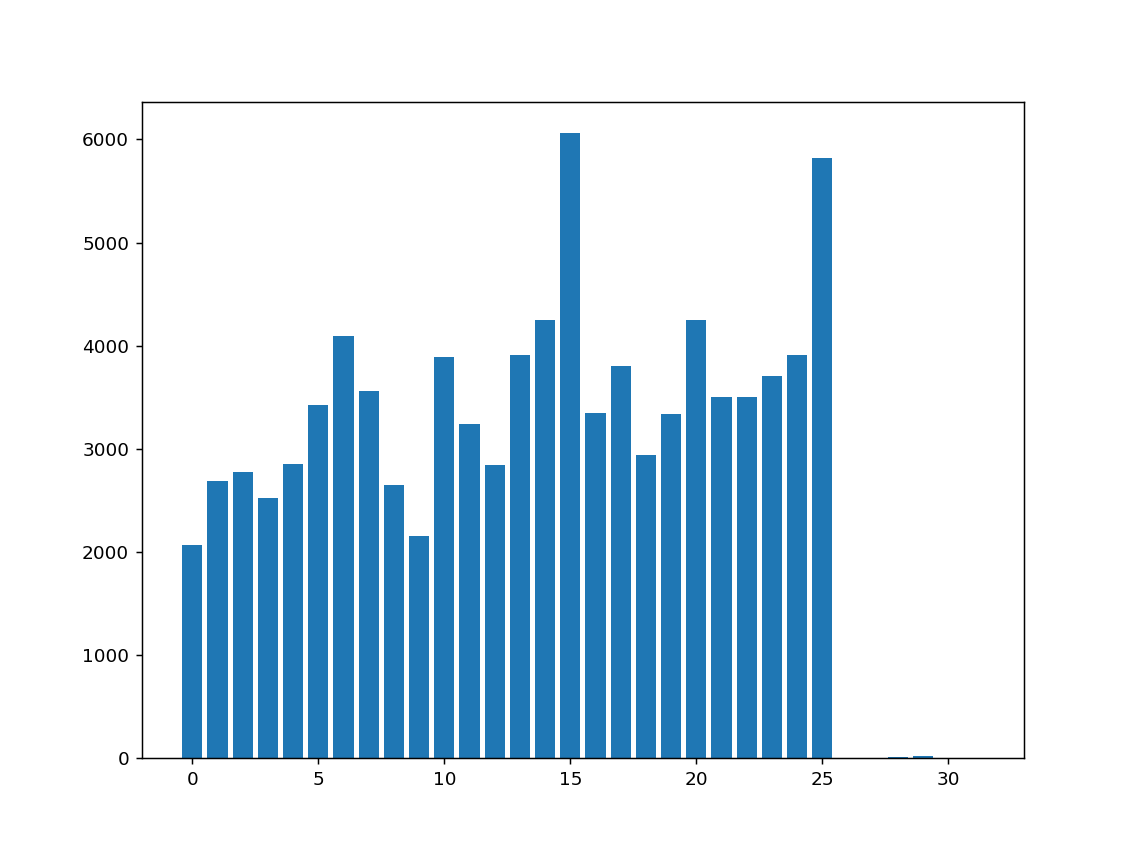

In [10]:
plt.bar(range(len(lens)), lens);

<IPython.core.display.Javascript object>


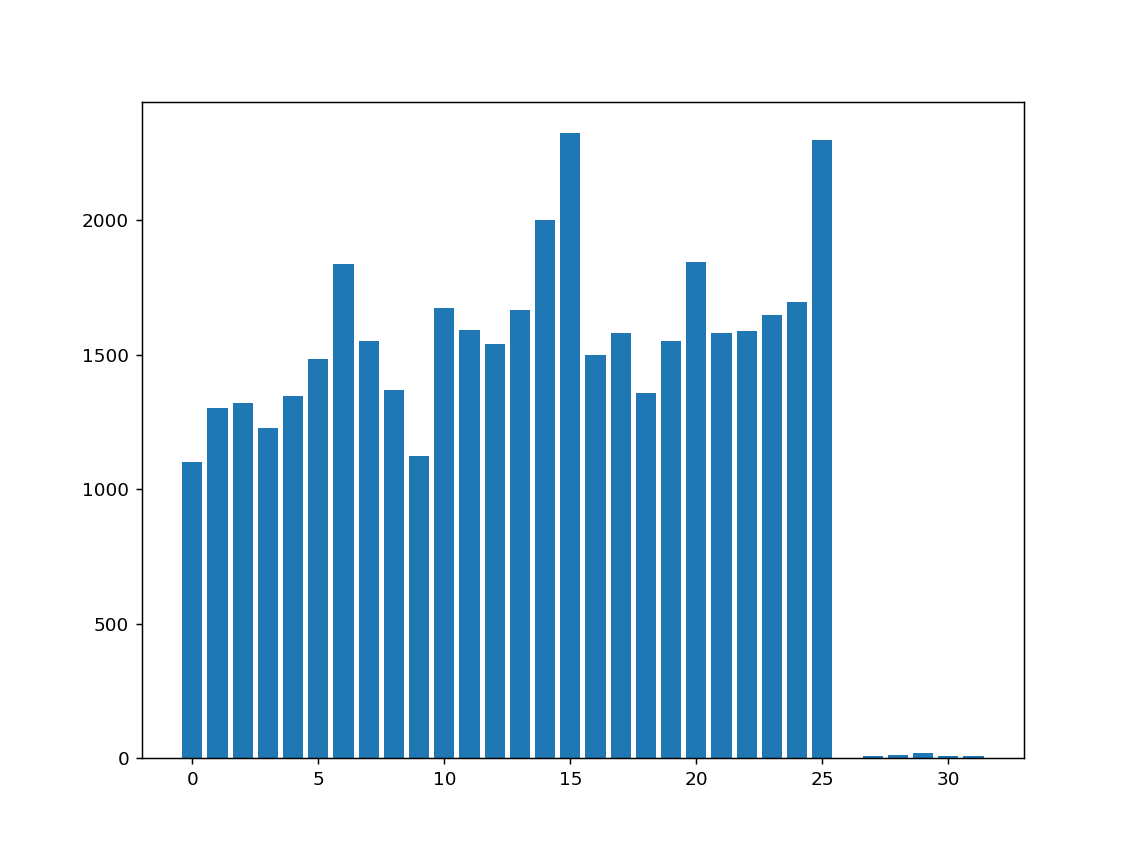

In [11]:
plt.bar(range(len(word_counts)), word_counts);

Здорово, но совершенно не наглядно. Поэтому попробуем поэкспериментировать. Для начала, расположим два графика рядом.

<IPython.core.display.Javascript object>


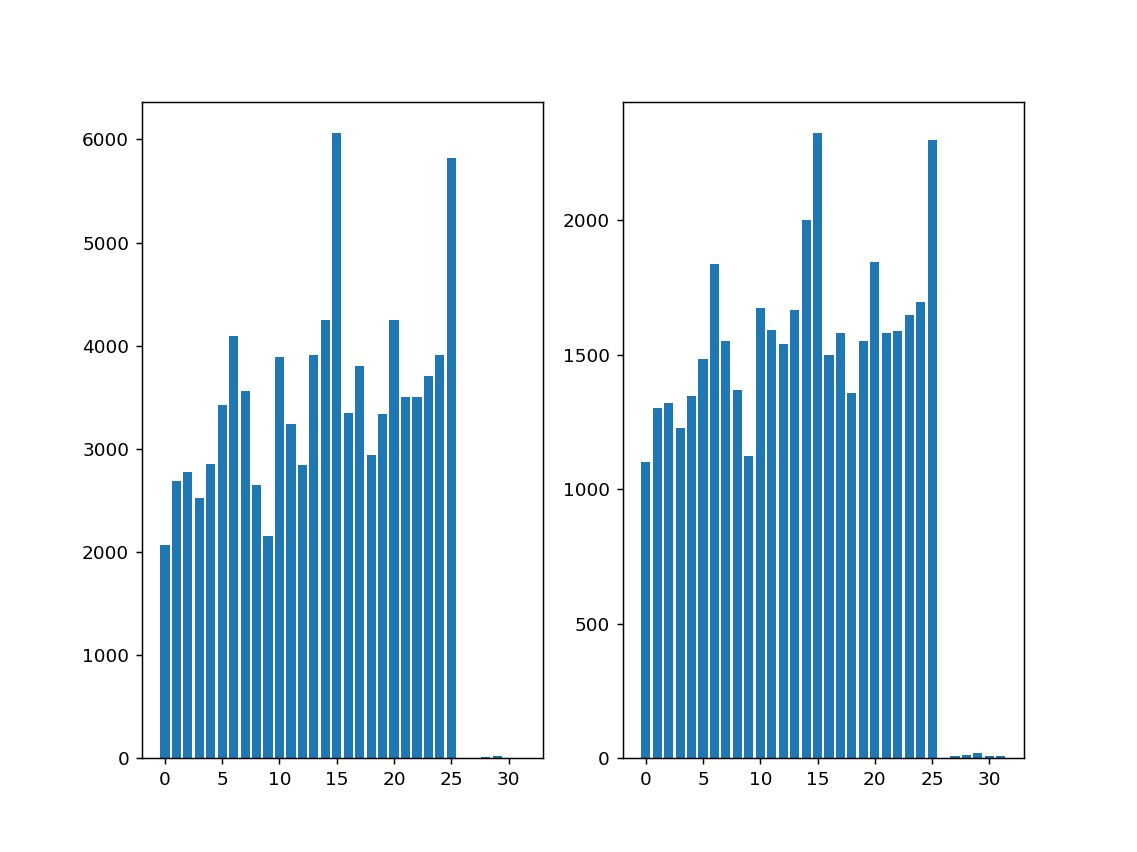

In [12]:
# Заводим рисунок из двух подграфиков, располоденных в один ряд и две колонки.
fig, axes = plt.subplots(1, 2)
# Нарисуем каждый график в своей зоне рисунка.
axes[0].bar(range(len(lens)), lens);
axes[1].bar(range(len(word_counts)), word_counts);

Меньше таскать фрагменты тетрадки туда-сюда, но всё ещё неудобно, особенно если надо сравнивать. Расположим графики вместе. Для этого надо поиграть с их координатами по оси Х.

<IPython.core.display.Javascript object>


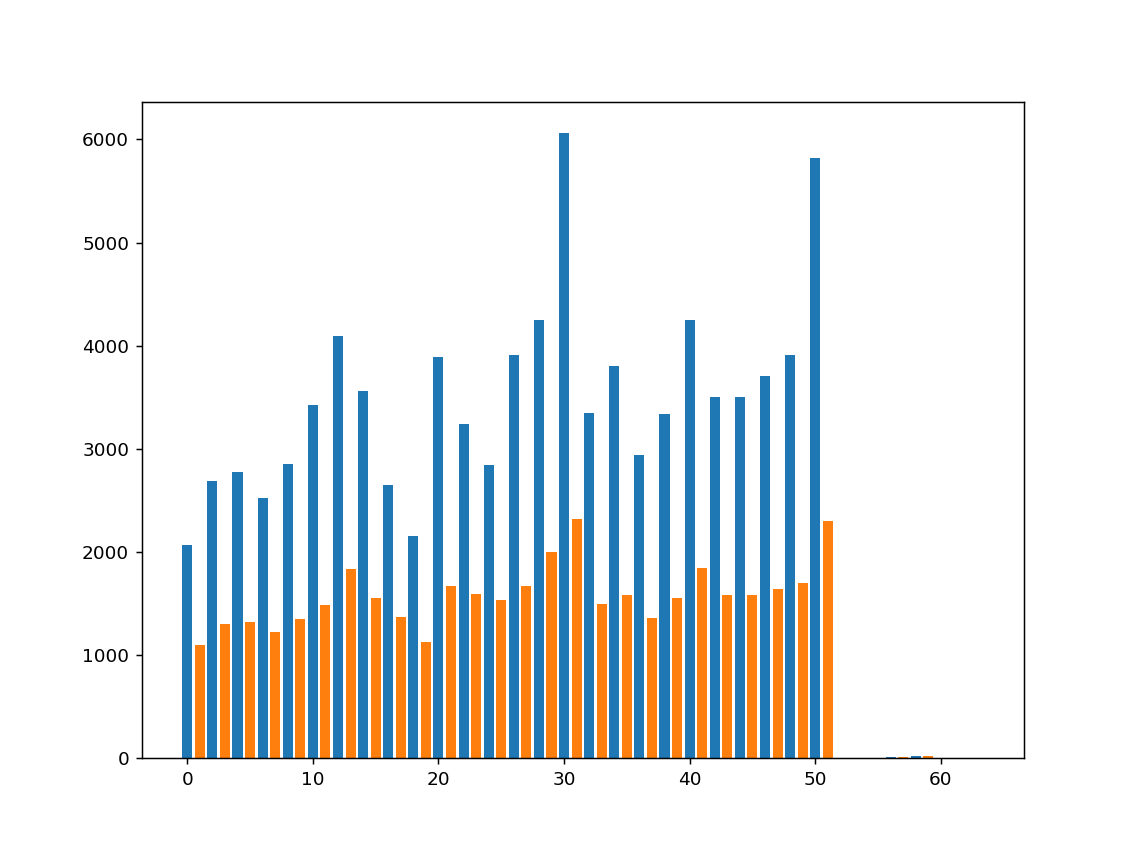

In [13]:
ax = plt.subplots()
x1 = [i*2 for i in range(len(lens))]
x2 = [i*2+1 for i in range(len(lens))]
plt.bar(x1, lens);
plt.bar(x2, word_counts);
plt.show()

Наглядно, но в статью не положишь. Где подрисуночная подпись? Где обозначения по осям? У нас что, 60 глав? Рисунок должен читаться сам по себе очевидным образом!

<IPython.core.display.Javascript object>


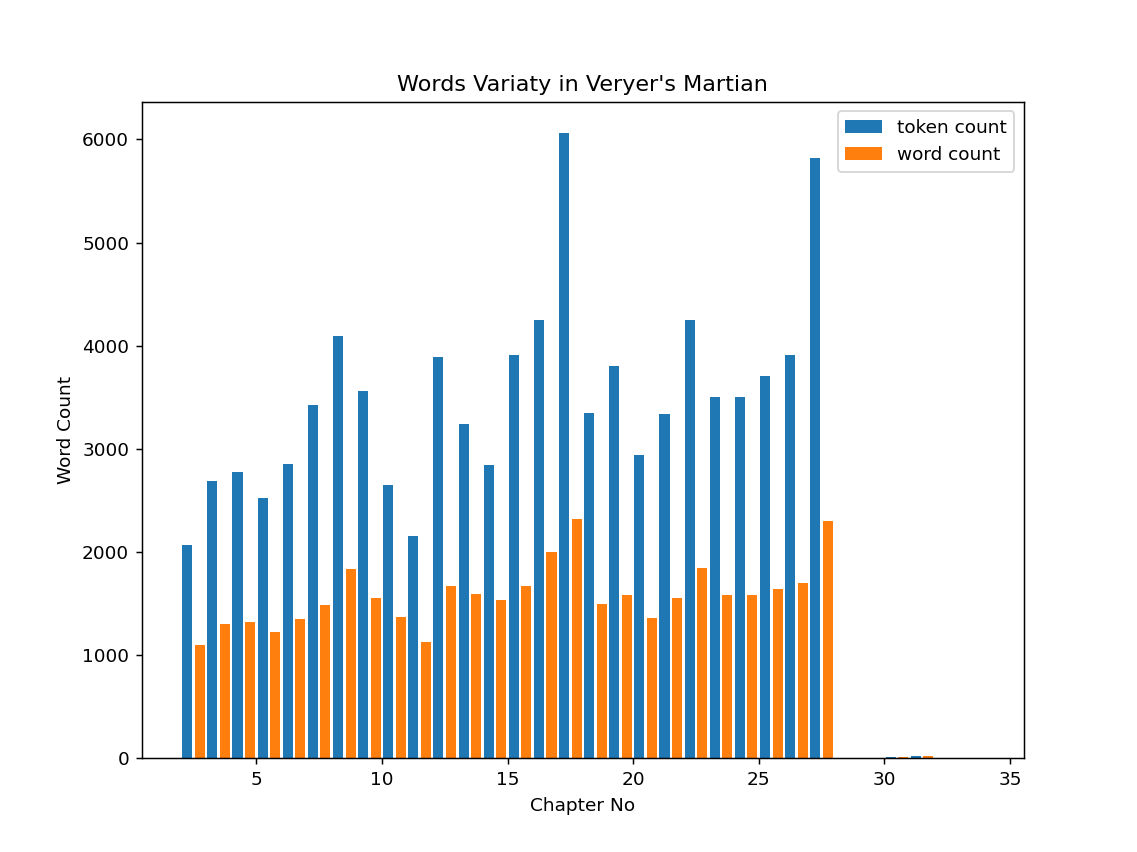

In [14]:
fig, ax = plt.subplots()
# Поиграем с координатами по осям.
x1 = [i+0.25 for i in range(2, len(lens)+2)]
x2 = [i+0.75 for i in range(2, len(lens)+2)]
plt.bar(x1, lens, width=0.4);
plt.bar(x2, word_counts, width=0.4);
# Добавим подписи.
ax.set_title("Words Variaty in Veryer's Martian")
ax.set_xlabel('Chapter No')
ax.set_ylabel('Word Count')
ax.legend(loc = 'upper right', labels=['token count', 'word count'])

plt.show()

Сохраним рисунок на диск для будущей статьи.

In [15]:
fig.set_dpi = 600
fig.savefig('results/veyr_fig_1.png')

### Расчет показателей активности повествования

Разобьем главы на фрагменты, лемматизируем (как-нибудь по-простому), посчитаем статистику.

In [16]:
import pymorphy2
import re
from collections import Counter
import numpy as np

In [17]:
morpho = pymorphy2.MorphAnalyzer()

In [18]:
step = 100
poses = []
for text in texts:
    words = re.findall('[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+',
                       text
                      )
    cpos = []
    for i in range(0, len(words), step):
        pos = []
        # Снятие омонимии - как всегда, самый вероятный вариант разбора.
        for word in words[i: i+step]:
            pos.append(str(morpho.parse(word)[0].tag.POS))
        cpos.append(pos)
    poses.append(cpos)

In [19]:
# Посчитаем количество частей речи по главам. Примечания брать не будем.
poses_stat = []
for pos in poses[:26]:
    poses_stat.append([Counter(p) for p in pos])
    
verbs, nouns, adjs, actions = [], [], [], []
for i in range(26):
    verbs.append([])
    nouns.append([])
    adjs.append([])
    actions.append([])
    
    for pos in poses_stat[i]:
        v, n, a = pos.get('VERB', 0), pos.get('NOUN', 0), pos.get('ADJF', 0)
        verbs[i].append(v/100)
        nouns[i].append(n/100)
        adjs[i].append(a/100)
        if n != 0:
            actions[i].append(v/n)
        else:
            actions[i].append(0)

Построим график активности повествования для первой главы. Получается ничего так.

<IPython.core.display.Javascript object>


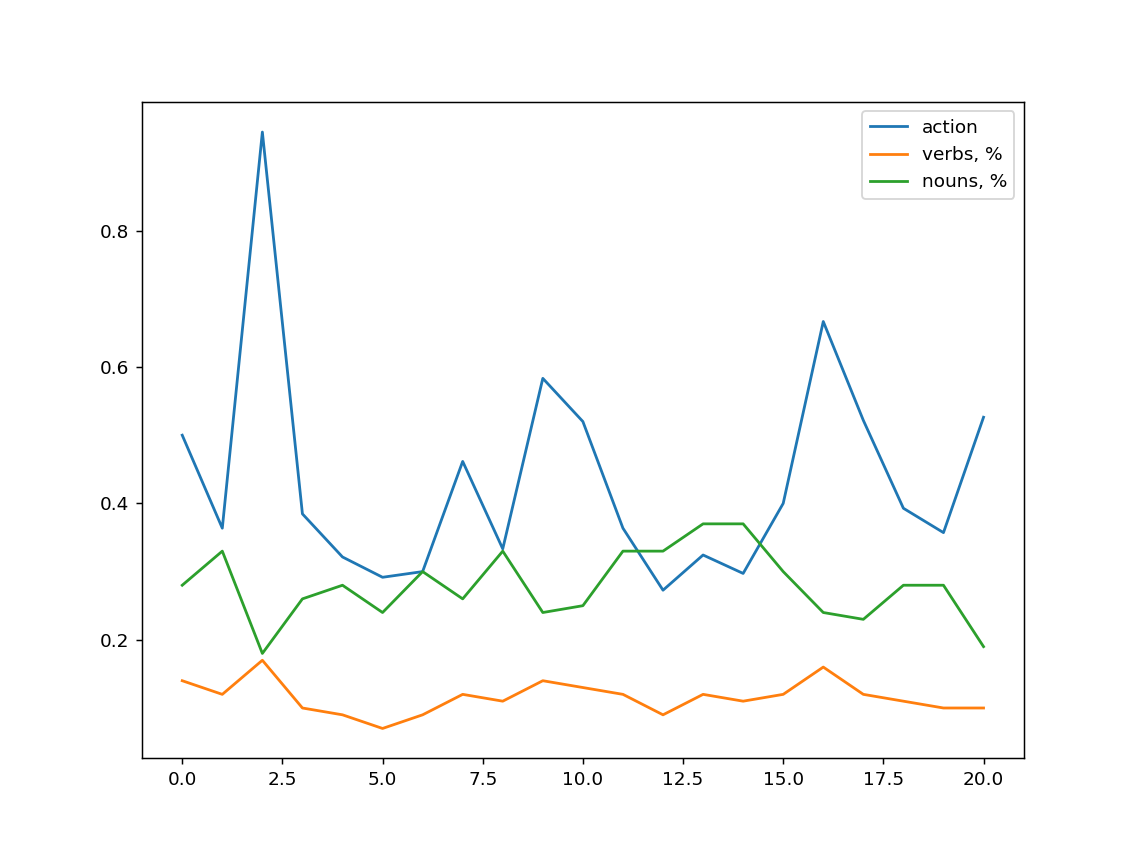

In [20]:
plt.plot(actions[0])
plt.plot(verbs[0])
plt.plot(nouns[0])
plt.legend(['action', 'verbs, %', 'nouns, %'])
plt.show()

Посмотрим, действительно ли рассчитанные значения как-то показывают активность повествования.

In [21]:
' '.join(
    re.findall('[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+',
               texts[0]
              )[200: 300]
        )

'лишь одним из членов команды Если честно во всей команде по званию я младше всех Я мог бы стать командиром лишь в одном случае если бы остался в одиночестве Ну что тут скажешь Теперь командир я Задаюсь вопросом найдут ли эти записи до того как остальная часть команды погибнет от старости Полагаю они вернутся на Землю в полном порядке Ребята если вы это читаете вашей вины в этом нет Вы сделали то что должны были сделать На вашем месте я поступил бы так же Не порицаю вас и так рад что вы спаслись Думаю следует объяснить как работают марсианские исследовательские'

Здорово, но хочется сравнить с другими главами. Нарисуем данные по первой и второй главам на одном рисунке.

<IPython.core.display.Javascript object>


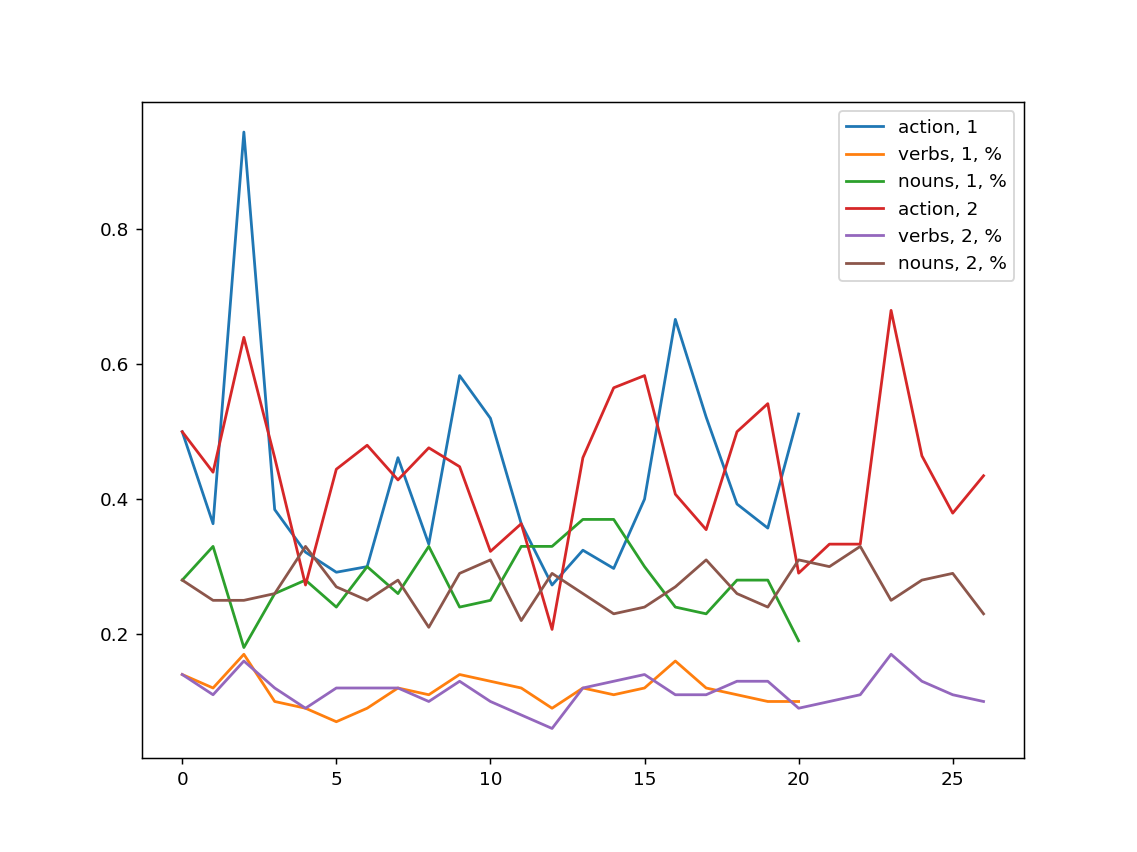

In [23]:
plt.plot(actions[0])
plt.plot(verbs[0])
plt.plot(nouns[0])
plt.plot(actions[1])
plt.plot(verbs[1])
plt.plot(nouns[1])
plt.legend(['action, 1', 'verbs, 1, %', 'nouns, 1, %', 'action, 2', 'verbs, 2, %', 'nouns, 2, %'])
plt.show()

<div style="width: 900px; height: 60px; overflow: hidden; ">
<img src="https://avatars.mds.yandex.net/i?id=f5d57b620303b27c00bec1bcf206a334-5523609-images-thumbs&n=13&exp=1" style="position: relative; top: -190px;" width="100%"></div>

## Добавляем красот

### IPyWidgets
А теперь добавим немного интерактива в наши изображения.  
Используем для этого библиотеку `ipywidgets`, которая добавляет элементы управления в тетрадку Юпитера. И переключимся из интерактивного режима отображения в режим простого отображения.
```python
%matplotlib inline
```

Хорошее введение в ipywidgets находится [здесь](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916?mkt_tok=eyJpIjoiWXpKbE5ERXdOMkprT0RGayIsInQiOiJaaVhjRzNtN0FJNUFhc3lvd1NzWDNmWEsrUlwvRm1oQzJBNGRFVERZeFp2Y0ROQWVhU0YycHFNMk1PR1R3SU5Pb3l4OTZRemhZM1ZYemtmUVFYeDZjakFKYXpkQ1JIQVlzcEwwWTZNNGh4S04wVitDcE96WGNieWgrNXdJYjQzOXYifQ%3D%3D)

In [24]:
%matplotlib inline

In [25]:
# Импортируем необходимые элементы управления.
from ipywidgets import interact, IntSlider, FloatSlider, IntRangeSlider

Данная библиотека может работать следующим образом. При помощи метода `interact` мы связываем некоторую функцию с элемемнтом управления. При изменении значения в элементе управления будет вызываться переданная функция.<br>
Заметим, что связывание может проводиться <a href="https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html">различым образом</a>.<br>
`IntSlider` создает слайдер, позволяющий выбрать целое значение.

In [26]:
def draw_action(no):
    fig2, ax2 = plt.subplots()
    fig2.set_size_inches(10, 5)
    ax2.plot(actions[no])
    ax2.plot(verbs[no])
    ax2.plot(nouns[no])
    ax2.set_title(f'Chapter {no}')
    ax2.legend(['action', 'verbs, %', 'nouns, %'])
    plt.show()

In [27]:
_ = interact(draw_action, no=IntSlider(min=0, max=25, value=0, step=1))

interactive(children=(IntSlider(value=0, description='no', max=25), Output()), _dom_classes=('widget-interact'…

Но нам всё ещё хочется сравнивать данные в двух главах. И таскать ползунок - не лучшее решение. Попробуем отобразить два графика.

In [31]:
from ipywidgets import BoundedIntText

In [32]:
def draw_action2(no, no2):
    fig2, ax2 = plt.subplots(1, 2)
    fig2.set_size_inches(16, 5)
    ax2[0].plot(actions[no])
    ax2[0].plot(verbs[no])
    ax2[0].plot(nouns[no])
    ax2[0].set_title(f'Chapter {no}')
    ax2[0].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    ax2[1].plot(actions[no2])
    ax2[1].plot(verbs[no2])
    ax2[1].plot(nouns[no2])
    ax2[1].set_title(f'Chapter {no2}')
    ax2[1].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    
    mp1x = np.argmax(actions[no])
    mp1y = actions[no][mp1x]
    ax2[0].annotate('max', xy=(mp1x, mp1y), xytext=(mp1x+0.5, mp1y-0.12),
            arrowprops=dict(facecolor='black', shrink=0.05),)
    mp2x = np.argmax(actions[no2])
    mp2y = actions[no2][mp2x]
    ax2[1].annotate('max', xy=(mp2x, mp2y), xytext=(mp2x+0.5, mp2y-0.12),
            arrowprops=dict(facecolor='blue', shrink=0.05),)
    
    plt.show()

In [33]:
_ = interact(draw_action2, 
           no=BoundedIntText(min=0, max=25, value=0, step=1, description='Chapter No:'),
           no2=BoundedIntText(min=0, max=25, value=0, step=1, description='Compare to:'))


interactive(children=(BoundedIntText(value=0, description='Chapter No:', max=25), BoundedIntText(value=0, desc…

Попробуем управлять цветом графиков.

In [34]:
from ipywidgets import ColorPicker, ToggleButtons

In [35]:
def draw_action3(no, no2, clr1, clr2, clr3):
    fig2, ax2 = plt.subplots(1, 2)
    fig2.set_size_inches(16, 5)
    ax2[0].plot(actions[no], color=clr1) #linestyle
    ax2[0].plot(verbs[no], color=clr2)
    ax2[0].plot(nouns[no], color=clr3)
    ax2[0].set_title(f'Chapter {no}')
    ax2[0].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    ax2[1].plot(actions[no2])
    ax2[1].plot(verbs[no2])
    ax2[1].plot(nouns[no2])
    ax2[1].set_title(f'Chapter {no2}')
    ax2[1].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    
    mp1x = np.argmax(actions[no])
    mp1y = actions[no][mp1x]
    ax2[0].annotate('max', xy=(mp1x, mp1y), xytext=(mp1x+0.5, mp1y-0.12),
            arrowprops=dict(facecolor='black', shrink=0.05),)
    mp2x = np.argmax(actions[no2])
    mp2y = actions[no2][mp2x]
    ax2[1].annotate('max', xy=(mp2x, mp2y), xytext=(mp2x+0.5, mp2y-0.12),
            arrowprops=dict(facecolor='blue', shrink=0.05),)
    
    plt.show()

In [36]:
_=interact(draw_action3, 
           no=BoundedIntText(min=0, max=25, value=0, step=1, description='Chapter No:'),
           no2=BoundedIntText(min=0, max=25, value=0, step=1, description='Compare to:'),
           clr1=ColorPicker(description='Action Color', value='blue'),
           clr2=ColorPicker(description='Verb Color', value='blue'),
           clr3=ColorPicker(description='Noun Color', value='blue')
          )


interactive(children=(BoundedIntText(value=0, description='Chapter No:', max=25), BoundedIntText(value=0, desc…

Попробуем работать с элементами управления по-другому. Пусть пользователь сперва задает параметры, а потом запускает отображение с учетом этих параметров.

In [37]:
sel_no = BoundedIntText(min=0, max=25, value=0, step=1, description='Chapter No:')
sel_no2 = BoundedIntText(min=0, max=25, value=0, step=1, description='Compare to:')
sel_clr1 = ColorPicker(description='Action Color', value='blue')
sel_clr2 = ColorPicker(description='Verb Color', value='green')
sel_clr3 = ColorPicker(description='Noun Color', value='#FACE8D')
btns3 = ToggleButtons(options=['- Solid', '-- Dashed', '-. Dash-Point'], description='Line Style:')
display(sel_no, sel_no2, sel_clr1, sel_clr2, sel_clr3, btns3)

BoundedIntText(value=0, description='Chapter No:', max=25)

BoundedIntText(value=0, description='Compare to:', max=25)

ColorPicker(value='blue', description='Action Color')

ColorPicker(value='green', description='Verb Color')

ColorPicker(value='#FACE8D', description='Noun Color')

ToggleButtons(description='Line Style:', options=('- Solid', '-- Dashed', '-. Dash-Point'), value='- Solid')

In [38]:
@interact
def draw_action4():
    no = sel_no.value
    no2 = sel_no2.value
    
    fig2, ax2 = plt.subplots(1, 2)
    fig2.set_size_inches(16, 5)
    ax2[0].plot(actions[no], color=sel_clr1.value) #linestyle
    ax2[0].plot(verbs[no], color=sel_clr2.value)
    ax2[0].plot(nouns[no], color=sel_clr3.value)
    ax2[0].set_title(f'Chapter {no}')
    ax2[0].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    ax2[1].plot(actions[no2])
    ax2[1].plot(verbs[no2])
    ax2[1].plot(nouns[no2])
    ax2[1].set_title(f'Chapter {no2}')
    ax2[1].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    
    mp1x = np.argmax(actions[no])
    mp1y = actions[no][mp1x]
    ax2[0].annotate('max', xy=(mp1x, mp1y), xytext=(mp1x+0.5, mp1y-0.12),
            arrowprops=dict(facecolor='black', shrink=0.05),)
    mp2x = np.argmax(actions[no2])
    mp2y = actions[no2][mp2x]
    ax2[1].annotate('max', xy=(mp2x, mp2y), xytext=(mp2x+0.5, mp2y-0.12),
            arrowprops=dict(facecolor='blue', shrink=0.05),)
    
    plt.show()

interactive(children=(Output(),), _dom_classes=('widget-interact',))

Добавим управление стилем линий при помощи SelectionSlider.

In [41]:
from ipywidgets import SelectionSlider

In [42]:
def draw_action5(style):
    no = sel_no.value
    no2 = sel_no2.value
    if style == 'solid':
        ls = '-'
    elif style == 'dashed':
        ls = '--'
    elif style == 'doted':
        ls = ':'
        
    
    fig2, ax2 = plt.subplots(1, 2)
    fig2.set_size_inches(16, 5)
    ax2[0].plot(actions[no], color=sel_clr1.value, linestyle=ls)
    ax2[0].plot(verbs[no], color=sel_clr2.value)
    ax2[0].plot(nouns[no], color=sel_clr3.value)
    ax2[0].set_title(f'Chapter {no}')
    ax2[0].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    ax2[1].plot(actions[no2])
    ax2[1].plot(verbs[no2])
    ax2[1].plot(nouns[no2])
    ax2[1].set_title(f'Chapter {no2}')
    ax2[1].legend(['action, $\lambda^2$', 'verbs, %', 'nouns, %'])
    
    mp1x = np.argmax(actions[no])
    mp1y = actions[no][mp1x]
    ax2[0].annotate('max', xy=(mp1x, mp1y), xytext=(mp1x+0.5, mp1y-0.12),
            arrowprops=dict(facecolor='black', shrink=0.05),)
    mp2x = np.argmax(actions[no2])
    mp2y = actions[no2][mp2x]
    ax2[1].annotate('max', xy=(mp2x, mp2y), xytext=(mp2x+0.5, mp2y-0.12),
            arrowprops=dict(facecolor='blue', shrink=0.05),)
    
    plt.show()

In [43]:
btns2 = SelectionSlider(options=['solid', 'dashed', 'doted'], value='solid',description='Line Style')
interact(draw_action5, style=btns2);

interactive(children=(SelectionSlider(description='Line Style', options=('solid', 'dashed', 'doted'), value='s…

Но уже хватит интерактива. Пока мы смотрели только на отдельные главы. Теперь посмотрим на них все через "ящик с усами".

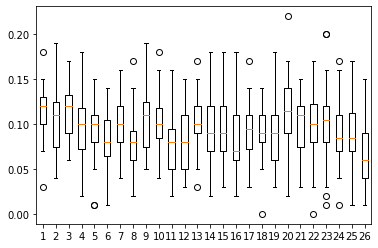

In [44]:
plt.boxplot(adjs)
plt.show()

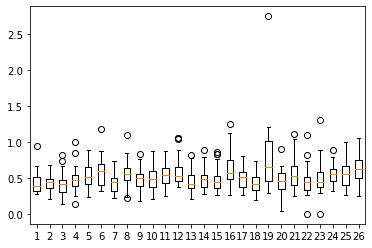

In [45]:
plt.boxplot(actions)
plt.show()

### Цветовые карты

Цвет графика можно задать при помощи цветовой карты. Для использования стандартных цветовых карт необходимо загрузить их из matplotlib:  

```Python
from matplotlib import cm
```  
А потом использовать ту, что больше нравится, в параметре cmap (а можно создать объект типа Colormap самостоятельно и передать туда же). В этом случае параметр **`c`** воспринимается как номер цвета в цветовой схеме, цветовая схема распределяется между минимальным и максимальным значениями. (И никто не мешал сделать то же самое с plot).

In [46]:
from matplotlib import cm

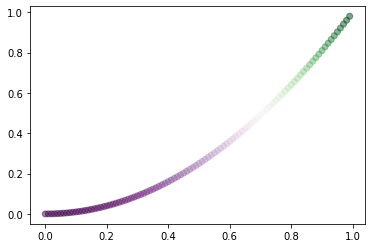

In [47]:
x=[i/100 for i in range(0,100)]
y=[i*i for i in x]
c=[i*i for i in x]

plt.scatter(x, y, c=c, alpha=0.5, cmap=cm.PRGn)

_=plt.show()

Вместо градиентной цветовой схемы можно использовать дискретную.

In [48]:
from matplotlib import cm

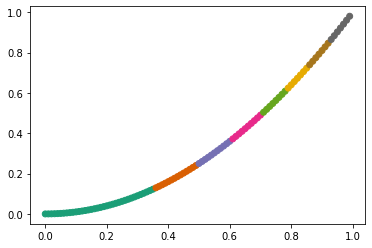

In [49]:
x=[i/100 for i in range(0,100)]
y=[i*i for i in x]
c=[i*i for i in x]

plt.scatter(x, y, c=c, cmap=cm.Dark2)

_=plt.show()

Или создать свою собственную. Импортируем цветовую схему, создаваемую из списка цветов.

In [50]:
from matplotlib.colors import ListedColormap
import random

Каждый цвет представляет собой RGBA-четверку. Ее можно получить из любой цветовой схемы или составить самостоятельно.

In [51]:
cm.jet(0.8)

(1.0, 0.40740740740740755, 0.0, 1.0)

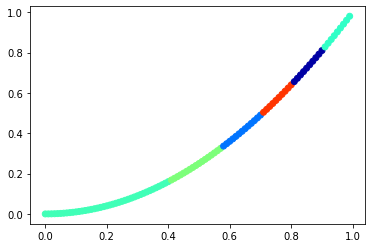

In [52]:
color_no = 6

# Создаем свою контрастную цветовую схему.
myclr=ListedColormap([cm.jet(random.random()) for i in range(color_no)]) # Генерируем контрастную карту цветов.

x=[i/100 for i in range(0,100)]
y=[i*i for i in x]
c=[i*i for i in x]

plt.scatter(x, y, c=c, cmap=myclr)

_=plt.show()

Ну и на всякий случай, разные цветовые схемы выглядят примерно <a href="http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/colormaps34c83.png?action=AttachFile&do=get&target=colormaps3.png">так</a>.

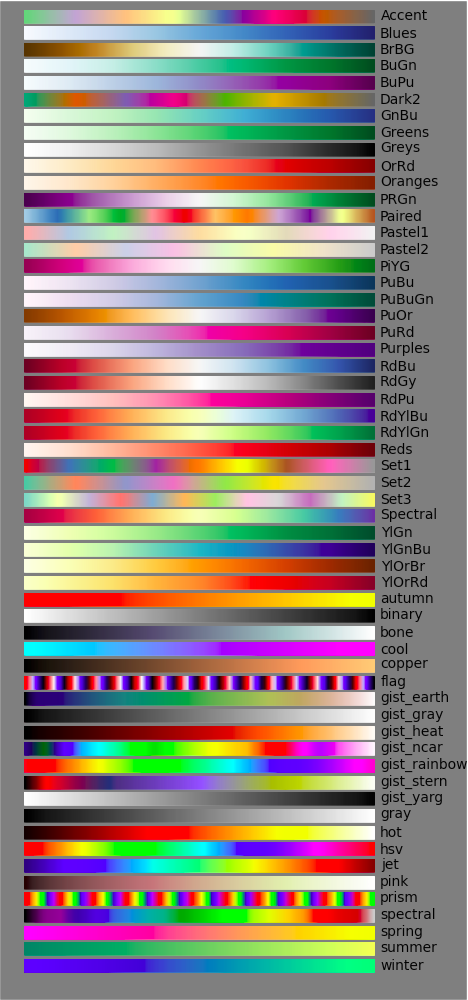

### Рисуем больше двух параметров на плоскости

А теперь сделаем следующий фокус. Сгенерируем матрицу точек, цвет точки будет задавать значение функции от двух переменных.<br>
Вопрос: какова размерность полученного графика?

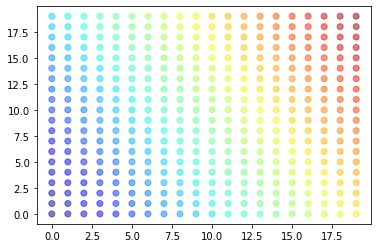

In [53]:
x1=[]
y1=[]
z1=[]
for r in range(20):
    for r2 in range(20):
        x1.append(r)
        y1.append(r2)
        z1.append(2*r+r2)

plt.scatter(x1, y1, c=z1, alpha=0.5, cmap=cm.jet)

_=plt.show()

Правильно, график трехмерный: две координаты и значение функции.<br>
И, да, я знаю, что с помощью numpy это делается проще.<br>
Теперь добавим размер точки, чтобы отобразить четверую координату.<br>

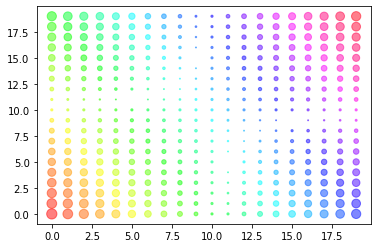

In [54]:
x1=[]
y1=[]
z1=[]
s1=[]
for r in range(20):
    for r2 in range(20):
        x1.append(r)
        y1.append(r2)
        z1.append(2*r+r2)
        s1.append(abs((r-10)*(r2-10)+5))

plt.scatter(x1, y1, c=z1, s=s1, alpha=0.5, cmap=cm.hsv)

_=plt.show()

Теперь возьмем другой вид графика - quiver. Данный график показывает стрелками такую информацию, как, например, направление течения. В него переаются координаты начала стрелок, а также вектор для стрелки. units='width' означает, относительно чего измеряется размер стрелок (в данном случае относительно ширины, но можно задать, например, в дюймах или пикселях). Также можно задать как определется направление стрелки - как угол/длина или как координаты.<br>
Всё о quiver <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html#matplotlib.pyplot.quiver">здесь</a>.

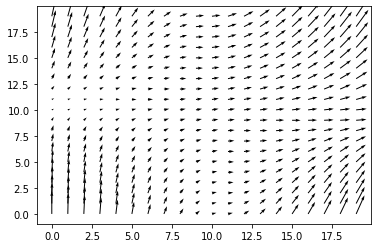

In [55]:
x1=[]
y1=[]
z1=[]
s1=[]
for r in range(20):
    for r2 in range(20):
        x1.append(r)
        y1.append(r2)
        z1.append(2*r+r2)
        s1.append(abs((r-10)*(r2-10)+5))

plt.quiver(x1, y1, z1, s1, units='width')

_=plt.show()

Итак, выше представлен четырехмерный график. Теперь добавим стрелкам цвет, чтобы получить пятимерный график.

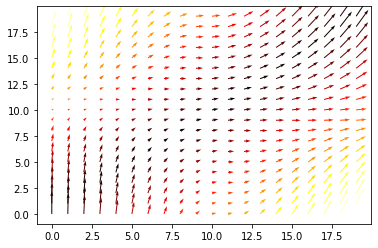

In [56]:
x1=[]
y1=[]
z1=[]
s1=[]
c1=[]
for r in range(20):
    for r2 in range(20):
        x1.append(r)
        y1.append(r2)
        z1.append(2*r+r2)
        s1.append(abs((r-10)*(r2-10)+5))
        c1.append(abs(r-r2))

plt.quiver(x1, y1, z1, s1, c1, units='width', cmap=cm.hot)

_=plt.show()

Теперь добавим к графику точки, которые будут показывать еще две координаты наших данных. Итого - семь измерений.

In [57]:
import math

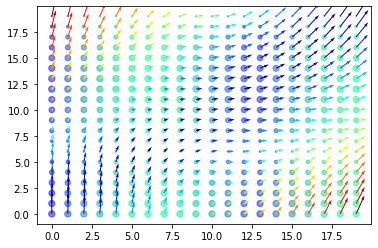

In [58]:
x1=[]
y1=[]
z1=[]
s1=[]
c1=[]
sc=[]
ss=[]
for r in range(20):
    for r2 in range(20):
        x1.append(r)
        y1.append(r2)
        z1.append(2*r+r2)
        s1.append(abs((r-10)*(r2-10)+5))
        c1.append(abs(r-r2))
        sc.append(abs(math.sin(r/4)))
        ss.append(abs(math.cos(r2/4))*40)

plt.scatter(x1, y1, c=sc, s=ss, alpha=0.5, cmap=cm.winter)
plt.quiver(x1, y1, z1, s1, c1, units='width', cmap=cm.jet)

_=plt.show()

А теперь посмотрим на данные в трехмерке.

In [59]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


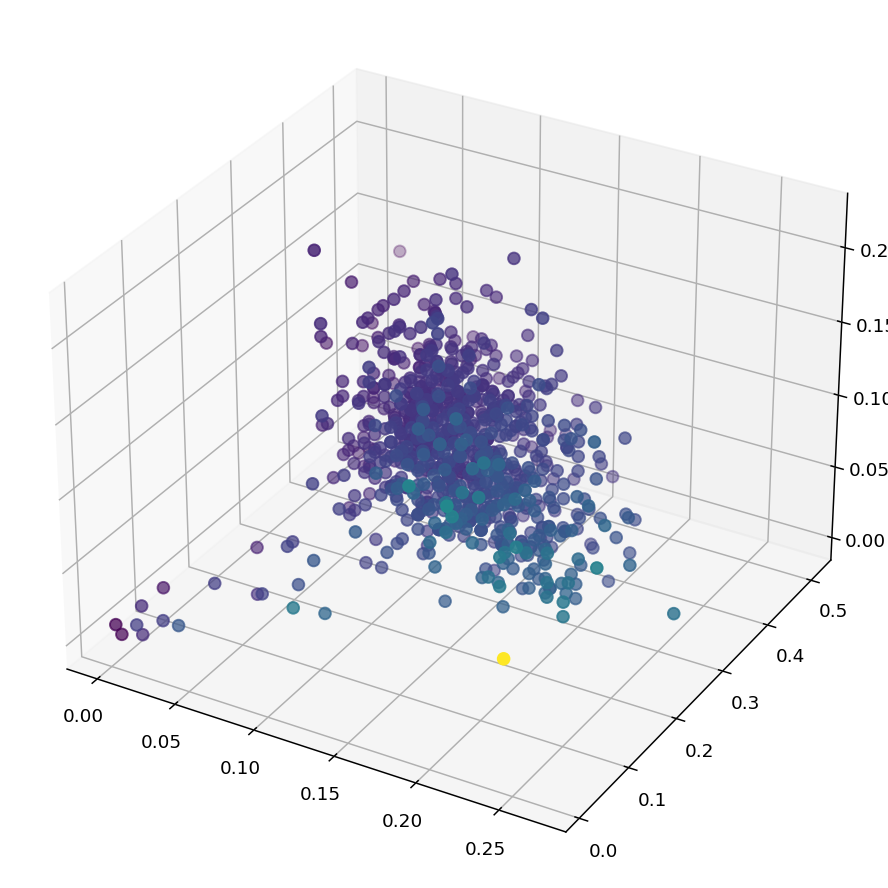

In [60]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

x, y, z, c = [], [], [], []
for verb, noun, adj, action in zip(verbs, nouns, adjs, actions):
    x.extend(verb)
    y.extend(noun)
    z.extend(adj)
    c.extend(action)

sc = ax.scatter(x, y, z, s=40, c=c, marker='o')


<div style="width: 900px; height: 60px; overflow: hidden; ">
<img src="https://avatars.mds.yandex.net/i?id=f5d57b620303b27c00bec1bcf206a334-5523609-images-thumbs&n=13&exp=1" style="position: relative; top: -190px;" width="100%"></div>

### Чуть более интересные графики
###   или
### Как (не) надо проведении исследований

Проведем небольшое исследование, основанное на материале данной статьи.<br>
<a href="https://nplus1.ru/news/2018/01/17/roasted">https://nplus1.ru/news/2018/01/17/roasted</a> <br>
В ней студенты провели исследование и выяснили, что картофель по-деревенски следует разрезать несколько иным способом, чтобы получить лучший вкус. Помимо этого картофель становится более приятным на вид и более хрустящим.<br>
У нас нет исходных данных по результатам опроса, но допустим, что они были распределены нормально со средним, указанным на графиках. Попробуем сгенерировать различные исходные данные, варьируя при этом дисперсию распределений.<br>

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [62]:
taste_cl = np.random.normal(7.2, 2.0, 100)
taste_new = np.random.normal(7.8, 2.0, 100)
crunch_cl = np.random.normal(6.4, 2.0, 100)
crunch_new = np.random.normal(8.5, 2.0, 100)
visual_cl = np.random.normal(7.8, 2.0, 100)
visual_new = np.random.normal(8.0, 2.0, 100)
averages_cl = np.array([np.average(taste_cl), np.average(crunch_cl), np.average(visual_cl)])
averages_cl = np.append(averages_cl, np.average(averages_cl))
averages_new = np.array([np.average(taste_new), np.average(crunch_new), np.average(visual_new)])
averages_new = np.append(averages_new, np.average(averages_new))

Построим теперь графики, показанные в статье, по сгенерированным данным (но плоские, а не трехмерные). Для этого используем столбчатую диаграмму (ax.bar) в которую передаются координаты по двум осям и другие известные нам параметры. Для того, чтобы графики не пересекались будем использовать смещение на ширину столбца. То есть получается, что между соседними показателями по оси X расстаяние равно 1, ширина каждого из столбцов 0.35, на расстояние между парами столбцов остается 0.3.  
Следующая особенность - использование тиков, то есть засечек (в нашем случае - по оси X). При помощи функции set_xticks передаем расположение засечек, а при помощи set_xticklabels задаем поддписи под засечками.  
Наконец, используем альфа-канал для построения "полупрозрачных" графиков".

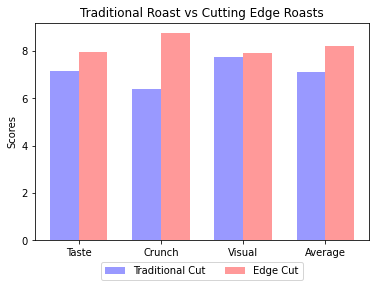

In [63]:
fig, ax = plt.subplots()
index = np.arange(4)
bar_width, opacity = 0.35, 0.4
rects1 = ax.bar(index, averages_cl, bar_width, alpha=opacity, color='b', label='Traditional Cut')
rects1 = ax.bar(index + bar_width, averages_new, bar_width, alpha=opacity, color='r', label='Edge Cut')
ax.set_ylabel('Scores')
ax.set_title('Traditional Roast vs Cutting Edge Roasts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Taste', 'Crunch', 'Visual', 'Average'))
ax.legend(loc = 'upper center', ncol=2, bbox_to_anchor=(0.5,-0.075))

plt.show()

Теперь убедимся, что по всем параметрам у нас имеется нормальное распределение. Для этого просто нарисуем гистограммы.<br>
Сразу становится видно несколько проблем. Во-первых, никто не проверил, что сгенерированы данные из интервала [0, 10] (часть данных выходит за этот интервал). Во-вторых, на ум приходит идея, что заодно никто не гарантировал, что данные будут целыми. Наконец, в-третьих, становятся видны проблемы с симметричностью распределения.<br>
Возвращаясь к Matplotlib. Функция hist принимает набор данных, для которых необходимо посчитать гистограмму и количество интервалов в ней (остальные параметры нам уже знакомы). Она настолько любезна, что возвращает значения. раскиданные по интервалам, границы интервалов и список объектов со столбиками.<br>

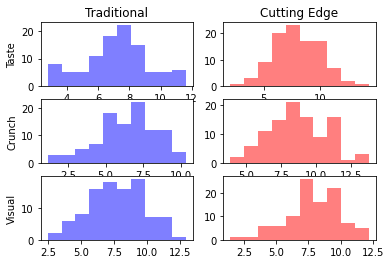

In [64]:
fig=plt.figure(1)
ax=fig.add_subplot(321)
plt.title('Traditional')
ax.set_ylabel('Taste')
n, bins, patches = plt.hist(taste_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(322)
plt.title('Cutting Edge')
n, bins, patches = plt.hist(taste_new, 10, facecolor='r', alpha=0.5)
ax=fig.add_subplot(323)
ax.set_ylabel('Crunch')
n, bins, patches = plt.hist(crunch_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(324)
n, bins, patches = plt.hist(crunch_new, 10, facecolor='r', alpha=0.5)
ax=fig.add_subplot(325)
ax.set_ylabel('Visual')
n, bins, patches = plt.hist(visual_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(326)
n, bins, patches = plt.hist(visual_new, 10, facecolor='r', alpha=0.5)

plt.show()

#print(patches[0], patches[1])

Для построения двумерной гистограммы можно использовать функцию <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist2d.html">hist2d</a>, в которую передается два массива данных (с X и Y координатами).<br>

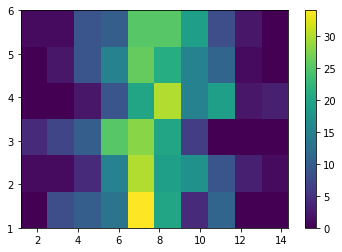

In [65]:
alldata=np.concatenate((taste_cl, taste_new, crunch_cl, crunch_new, visual_cl, visual_new))
allsets=np.concatenate((np.ones(100), np.ones(100)*2, np.ones(100)*3, np.ones(100)*4, np.ones(100)*5, np.ones(100)*6))
fig, ax=plt.subplots()
plt.hist2d(alldata, allsets, bins=[10,6])
plt.colorbar()
plt.show()

Полученная гистограмма показывает, насколько не совпадают средние значения для традиционного и предложенного методов. Однако пообная разница может быть лишь отклонениемм, связанным с выборкой. Теперь нам необходимо проверить статистическую значимость подобного отклонения. <br>
В соответствии с существующими <a href="https://stepik.org/course/76/">методами проверки статистической значимости</a> рассчитаем доверительный интервал как $M \pm \alpha * se$, где $se=\frac{s^2}{\sqrt{n}}$, $s^2$ - дисперсия, а $n$ - количество экспериментов (в нашем случае - 100). $\alpha$ выбирается исходя из необходимого уровня достоверности (в нашем случае равнялось 1,96).<br>
Для отображения стандартной ошибки используется параметр yerr (существует также параметр xerr, который показывает ошибку по оси X; при использовании обоих параметров ошибка приобретает форму креста). Ее параметры отображения задаются параметром error_kw.<br>
Но так как нам хочется ориентироваться на числовые данные, то в низ графика доблавляем таблицу с ними. Мы делаем это при помощи функции <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.table.html">plt.table</a>, в которую передаются строковая таблица, подписи по колонкам и строкам, расположение таблицы.


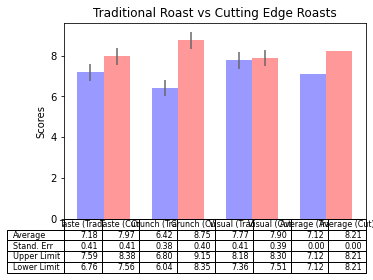

In [66]:
sterr_cl = 1.96 * np.array([np.std(taste_cl), np.std(crunch_cl), np.std(visual_cl), 0])/10
sterr_new = 1.96 * np.array([np.std(taste_new), np.std(crunch_new), np.std(visual_new), 0])/10

fig, ax = plt.subplots()
index = np.arange(4)
bar_width, opacity = 0.35, 0.4
error_config = {'ecolor': '0.4'}

rects1 = ax.bar(index, averages_cl, bar_width, yerr=sterr_cl, error_kw=error_config, alpha=opacity, color='b', label='Traditional Cut')
rects1 = ax.bar(index + bar_width, averages_new, bar_width, yerr=sterr_new, error_kw=error_config, alpha=opacity, color='r', label='Edge Cut')
ax.set_ylabel('Scores')
ax.set_title('Traditional Roast vs Cutting Edge Roasts')
# Убираем подписи по оси Х и легенду, как будто таблица сама служит подписью.
#ax.set_xticks(index + bar_width / 2)
#ax.set_xticklabels(('Taste', 'Crunch', 'Visual', 'Average'))
#ax.legend(loc = 'upper center', ncol=2, bbox_to_anchor=(0.5,-0.05))
ax.set_xticks([])

# Рисуем таблицу
columns = ('Taste (Trad)', 'Taste (Cut)', 'Crunch (Trad)', 'Crunch (Cut)', 'Visual (Trad)', 'Visual (Cut)', 'Average (Trad)', 'Average (Cut)')
rows = ['Average', 'Stand. Err', 'Upper Limit', 'Lower Limit']
cell_text = [[],[],[],[]]
for i in range(4):
    cell_text[0].append('%1.2f' % (averages_cl[i]))
    cell_text[0].append('%1.2f' % (averages_new[i]))
for i in range(4):
    cell_text[1].append('%1.2f' % (sterr_cl[i]))
    cell_text[1].append('%1.2f' % (sterr_new[i]))
for i in range(4):
    cell_text[2].append('%1.2f' % (averages_cl[i] + sterr_cl[i]))
    cell_text[2].append('%1.2f' % (averages_new[i] + sterr_new[i]))
for i in range(4):
    cell_text[3].append('%1.2f' % (averages_cl[i] - sterr_cl[i]))
    cell_text[3].append('%1.2f' % (averages_new[i] - sterr_new[i]))

the_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom')
# Просим таблицу не подбирать шрифт автоматически, устанавливаем 8-й кегль, даем больше места снизу графика.
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()

Также построим построим две <a href="https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8">диаграммы размаха</a>. Для этого попросим создать два графика (одна строка, две колонки)<br>
<a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html">plt.subplots</a>(nrows=1, ncols=2, figsize=(9, 4))<br>
Отрисуем на них диаграммы размаха при помощи функции boxplot, в которую передаются массивы данных, для которых нужно строить диаграммы, расположение и метки для диаграмм. Также просим сделать диаграммы разноцветными (patch_artist=True и далее patch.set_facecolor(color)).

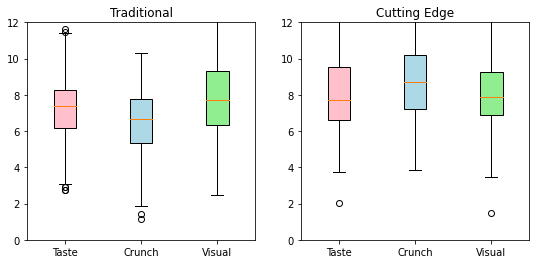

In [67]:
all_cl=np.ones((100, 3))
all_cl[:,0]=taste_cl
all_cl[:,1]=crunch_cl
all_cl[:,2]=visual_cl
all_new=np.ones((100, 3))
all_new[:,0]=taste_new
all_new[:,1]=crunch_new
all_new[:,2]=visual_new

labels = ['Taste', 'Crunch', 'Visual']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].set_ylim([0, 12])
bplot1 = axes[0].boxplot(all_cl,vert=True, patch_artist=True, labels=labels)
axes[0].set_title('Traditional')
bplot2 = axes[1].boxplot(all_new, vert=True, patch_artist=True, labels=labels)
axes[1].set_ylim([0, 12])
axes[1].set_title('Cutting Edge')
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

# Seaborn

Более новой библиотекой является Seaborn. У него побольше возможностей и по умолчанию покрасивее рисунки.

In [68]:
import pandas as pd
import seaborn as sns

Сгенерируем данные в DataFrame (потому что seaborn просто предназначен для работы с Pandas). Средние значения оставим такими же, какими они были.

In [69]:
pd1=pd.DataFrame()
pd2=pd.DataFrame()

pd1['Values']=np.random.normal(7.2, 2.0, 100)
pd1['Type']='Taste Cls'
pd2['Values']=np.random.normal(7.8, 2.0, 100)
pd2['Type']='Crunch Cls'
pd1=pd1.append(pd2)
pd2['Values']=np.random.normal(6.4, 2.0, 100)
pd2['Type']='Visual Cls'
pd1=pd1.append(pd2)

pd2['Values']=np.random.normal(8.5, 2.0, 100)
pd2['Type']='Taste New'
pd1=pd1.append(pd2)
pd2['Values']=np.random.normal(7.8, 2.0, 100)
pd2['Type']='Crunch New'
pd1=pd1.append(pd2)
pd2['Values']=np.random.normal(8.0, 2.0, 100)
pd2['Type']='Visual New'
pd1=pd1.append(pd2)

pd1.head()

Values       Type
0  4.201447  Taste Cls
1  4.951545  Taste Cls
2  4.372025  Taste Cls
3  2.025654  Taste Cls
4  6.721730  Taste Cls

Построим теперь графики.<br>
Как мы выяснили в прошлый раз, мы совершенно зря генерируем данные с оценками больше 10, так как изначально такая оценка не предусматривалась. Попробуем оценить количество таких значений. Для этого построим гистограмму с количеством таких оценок.<br>
В seaborn для этого используется метод countplot. В него передаются DataFrame и от одного до трех параметров - <b>x</b>, <b>y</b> и <b>hue</b>, в которых хранятся названия столбцов из DataFrame либо сами отображаемые данные. Параметр <b>x</b> используется для разделения значений на отдельные столбцы гистограммы.<br>
В простейшем случае гистограмма будет выглядеть вот так.<br>

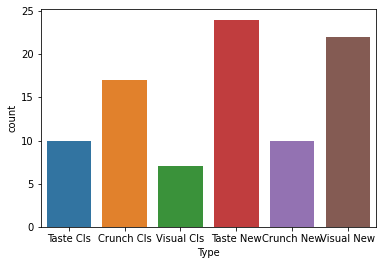

In [70]:
ax2=sns.countplot(x='Type', data=pd1[pd1['Values']>10])

Если переданы данные, параметр `orient` будет определять ориентацию гистограммы: вертикальная ('v') или горизонтальная ('h').<br>
Параметр `order` показывавет порядок следования значений парамтеров по выбранной оси. Если он не указан, значения будут следовать в том порядке, в котором они выбираются из DataFrame.<br>

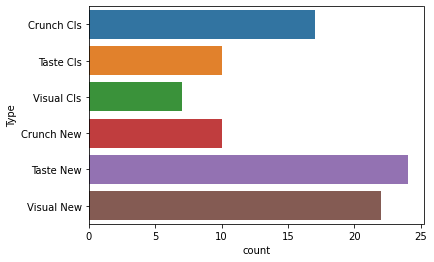

In [71]:
ax2=sns.countplot(y='Type', data=pd1[pd1['Values']>10], order=['Crunch Cls', 'Taste Cls', 'Visual Cls', 'Crunch New', 'Taste New', 'Visual New'])

Кстати, подключение seaborn влияет на отрисовку графиков при помощи Pandas.<br>
Вызов `sns.set(style="darkgrid")` меняет оформление графиков - они будут рисоваться на светло-сером фоне с белыми линиями сетки.

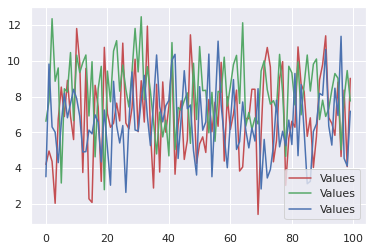

In [72]:
sns.set(style="darkgrid")
ax2=pd1[:100].plot(color='r')
ax2=pd1[100:200].plot(ax=ax2, color='g')
ax2=pd1[200:300].plot(ax=ax2, color='b')
#ax2=pd1.plot()

Теперь отрисуем диаграмму размаха, используя seaborn. Для этого используем метод boxplot, в который передаются те же самые параметры. 

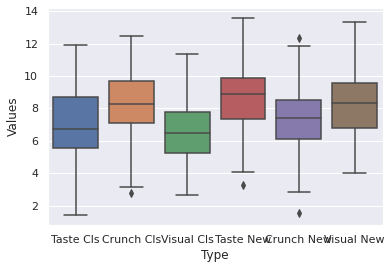

In [73]:
ax2=sns.boxplot(x='Type', y='Values', data=pd1)

А теперь отрисуем Violin Plot. На нем с двух отображается функция плотности распределения вероятности. За счет этого можно оценить форму распределения (если получится ее оценить визуально). Помимо плотности функции распределения он показывает стандартные "ящик" и "усы" от диаграммы размаха (не в толщиной линий). <br>
Параметры у функции те же.

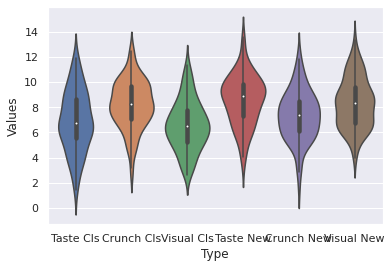

In [74]:
ax2=sns.violinplot(x='Type', y='Values', data=pd1)

Еще одним вариантом отображения расположения точек является swarmplot. Он показывает расположение точек так, чтобы их проекция приходилась на их положение по выбранной оси.

/home/edward/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


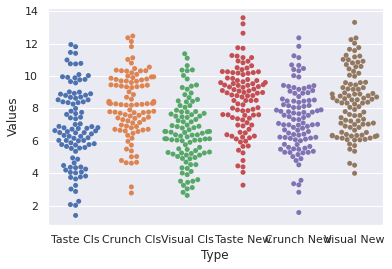

In [75]:
ax2=sns.swarmplot(x='Type', y='Values', data=pd1)

Наконец, мы можем совместить два вида диаграмм на одной. Используем одновременно violinplot и swarmplot.<br>
Чтобы было лучше видно, используем разные палитры (о них можно почитать <a href="http://seaborn.pydata.org/tutorial/color_palettes.html">здесь</a>).

/home/edward/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edward/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edward/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edward/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


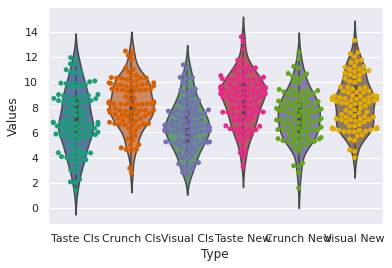

In [76]:
ax2=sns.violinplot(x='Type', y='Values', data=pd1)
ax2=sns.swarmplot(x='Type', y='Values', data=pd1, ax=ax2, palette='Dark2')

А теперь посмотрим как работает график, называемый "тепловая карта". Данный график группирует между собой некоторые показатели и отображает их в виде таблицы, в которой сходные объекты находятся рядом. Для этого используется clustermap. В минимальной комплектации в него можно подать только квадратную матрицу с мерами сходства между объектами, остальную раоту он проделает сам.<br> 
Для проверки подсунем ему матрицу сходства между языками, рассчитанную в некотором предыдущем исследовании. Загрузим данные.

In [77]:
dfc=pd.read_csv("data/lang_correlations_syntax.csv", sep=";", index_col=0)
dfc.head()

Czech    Slovak    Polish   Russian  Ukrainian  Bulgarian  \
Czech      1.000000  0.895674  0.795171  0.884275   0.927431   0.896647   
Slovak     0.895674  1.000000  0.623924  0.839251   0.870940   0.848789   
Polish     0.795171  0.623924  1.000000  0.597016   0.694101   0.645924   
Russian    0.884275  0.839251  0.597016  1.000000   0.963361   0.913424   
Ukrainian  0.927431  0.870940  0.694101  0.963361   1.000000   0.912538   

           Croatian   Serbian  Slovenian  Church Slavonic  ...     Hindi  \
Czech      0.771611  0.607420   0.868906         0.414214  ...  0.138122   
Slovak     0.890183  0.756875   0.830268         0.385672  ...  0.091970   
Polish     0.499894  0.381591   0.594005         0.326089  ...  0.057360   
Russian    0.779023  0.613041   0.892276         0.440570  ...  0.132448   
Ukrainian  0.772673  0.600710   0.907300         0.446848  ...  0.149046   

               Urdu   Persian  Japanese   Chinese    Korean  Indonesian  \
Czech      0.079089  0.182288 -0.036511  0.357868  0.142249    0.423253   
Slovak     0.041430  0.068824 -0.037155  0.423776  0.062552    0.362361   
Polish     0.047146  0.264447 -0.030214  0.172030  0.069919    0.248904   
Russian    0.101048  0.095341 -0.029992  0.378713 -0.007593    0.408374   
Ukrainian  0.090362  0.097057 -0.029297  0.387099 -0.015692    0.387326   

           Vietnamese    Basque   Turkish  
Czech        0.248573  0.809449  0.754505  
Slovak       0.197325  0.799467  0.696398  
Polish       0.179266  0.563346  0.525508  
Russian      0.241255  0.731220  0.752968  
Ukrainian    0.234496  0.769298  0.789824  

[5 rows x 46 columns]

А теперь попробуем на них тепловую карту.<br>

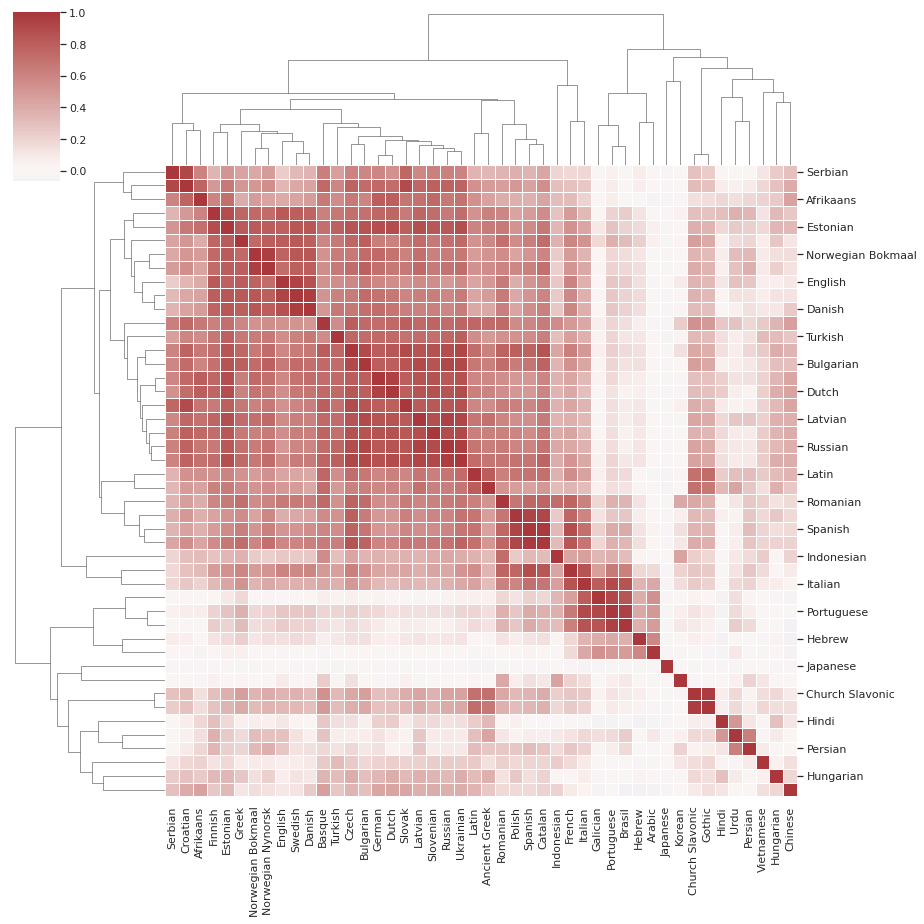

In [78]:
sns.clustermap(dfc, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13));

<div style="width: 900px; height: 60px; overflow: hidden; ">
<img src="https://avatars.mds.yandex.net/i?id=f5d57b620303b27c00bec1bcf206a334-5523609-images-thumbs&n=13&exp=1" style="position: relative; top: -190px;" width="100%"></div>

## Облако слов
А еще можно нарисовать облако слов при помощи соответствующей библиотеки.

In [79]:
!pip3 install wordcloud

In [80]:
from wordcloud import WordCloud
import pymorphy2
import re

In [81]:
def drawCloudMap(filename):
    with open(filename) as infile:
        text = infile.read()
    # Создаем объект, размер картинки 480х480, рисовать будем цветовой схемой Jet.
    wc = WordCloud(colormap=plt.cm.jet, width = 480, height = 480)
    wc.generate(text)

    # Нарисуем две картинки, на второй оставим только слова со значимыми частями речи.
    plt.subplot(121)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)

    dct = pymorphy2.MorphAnalyzer()

    words = []
    for token in re.findall("[а-яА-ЯёЁ]+", text):
        wf = dct.parse(token)[0]
        if wf.tag.POS  in ['ADJF', 'NOUN', 'VERB', 'PRTF']:
            words.append(wf.normal_form)

    wc2 = WordCloud(colormap=plt.cm.jet, width = 480, height = 480)
    wc2.generate(" ".join(words))
    plt.subplot(122)
    plt.imshow(wc2, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)


    plt.show()

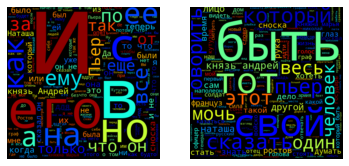

In [82]:
# Начнем с "Войны и мира".
drawCloudMap("data/war_and_peace.txt")

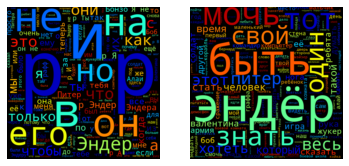

In [83]:
# Продолжим "Игрой Эндера".
drawCloudMap("data/Kard_Orson__Igra_Jendera.fb2")

Кстати, функция `plt.imshow` отвечает за рисование картинок. Загрузим картинку при помощи `plt.imread`и нарисуем ее на координатных осях.

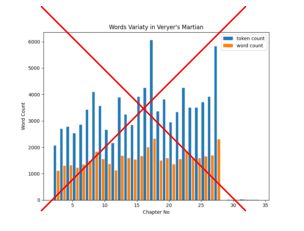

In [84]:
with open('results/veyr_fig_1.png', 'rb') as image_file:
    image = plt.imread(image_file)
    
plt.imshow(image, interpolation='bilinear')
plt.plot((100, 700), (600, 0), color='red')
plt.plot((100, 700), (0, 600), color='red')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

# Plotly.Express

In [85]:
import plotly.express as px

In [86]:
px.bar(x=range(len(actions[0])), y=verbs[0], color=actions[0])

In [87]:
px.bar(x=verbs[0], y=actions[0], color=actions[0])

In [88]:
from pandas import DataFrame

In [89]:
data = []
for i in range(len(actions)):
    for j, (verb, noun, adj, action) in enumerate(zip(verbs[i], nouns[i], adjs[i], actions[i])):
        data.append({"chapter":i, "part":j, "verbs": verb, "nouns": noun, "adjs": adj, "action": action})
    
df = DataFrame(data)

fig = px.area(df[df.chapter==0], x="verbs", y="action", color="nouns")#,
#               line_group="country")
fig.show()

In [90]:
df

chapter  part  verbs  nouns  adjs    action
0          0     0   0.14   0.28  0.14  0.500000
1          0     1   0.12   0.33  0.11  0.363636
2          0     2   0.17   0.18  0.12  0.944444
3          0     3   0.10   0.26  0.15  0.384615
4          0     4   0.09   0.28  0.18  0.321429
..       ...   ...    ...    ...   ...       ...
921       25    54   0.15   0.24  0.07  0.625000
922       25    55   0.16   0.23  0.10  0.695652
923       25    56   0.15   0.27  0.09  0.555556
924       25    57   0.19   0.23  0.03  0.826087
925       25    58   0.04   0.08  0.03  0.500000

[926 rows x 6 columns]

In [91]:
x, y, z, c = [], [], [], []
for verb, noun, adj, action in zip(verbs, nouns, adjs, actions):
    x.extend(verb)
    y.extend(noun)
    z.extend(adj)
    c.extend(action)

fig = px.scatter_3d(x=x, y=y, z=z,
              color=c, size=c)
fig.show()

In [92]:
px.box(actions)

![](https://rdk-pristen.kursk.muzkult.ru/media/2021/01/31/1247057358/1396791428_vinetka-14.jpg)